<a href="https://colab.research.google.com/github/Akarinr/Stock_TA/blob/main/diss_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
import tensorflow as tf
import random
from keras.utils import plot_model



In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4725    0  4725    0     0    692      0 --:--:--  0:00:06 --:--:--  1311
100  517k  100  517k    0     0  73752      0  0:00:07  0:00:07 --:--:-- 73752
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4741    0  4741    0     0   2658      0 --:--:--  0:00:01 --:--:--  2657
100  392k  100  392k    0     0   176k      0  0:00:02  0:00:02 --:--:--  176k


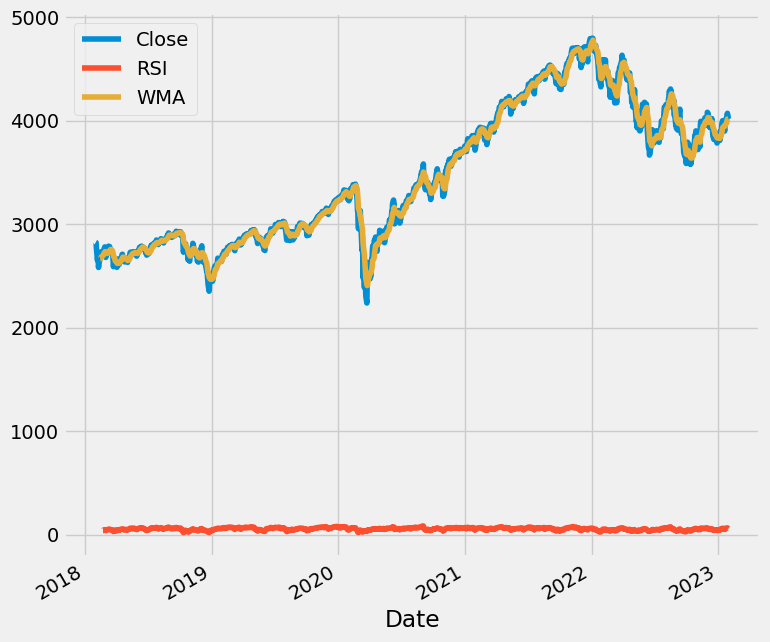

,Close,RSI,WMA
Date,,,
2018-01-31 00:00:00-05:00,2823.810059,NaN,NaN
2018-02-01 00:00:00-05:00,2821.979980,NaN,NaN
2018-02-02 00:00:00-05:00,2762.129883,NaN,NaN
2018-02-05 00:00:00-05:00,2648.939941,NaN,NaN
2018-02-06 00:00:00-05:00,2695.139893,NaN,NaN
...,...,...,...
2023-01-24 00:00:00-05:00,4016.949951,59.522692,3977.326771
2023-01-25 00:00:00-05:00,4016.219971,59.429580,3985.745486
2023-01-26 00:00:00-05:00,4060.429932,63.185637,4000.439284


In [ ]:
SP_500 = yf.Ticker('^gspc')
SP_500_df = SP_500.history(start="2018-01-31", end="2023-01-31")

SP_500_df['RSI'] = talib.RSI(SP_500_df['Close'],timeperiod=14)
SP_500_df['WMA'] = talib.WMA(SP_500_df['Close'],timeperiod=10)
#SP_500_df["stochastic_k"], SP_500_df["stochastic_d"] = talib.STOCH(SP_500_df["High"], SP_500_df["Low"], SP_500_df["Close"], fastk_period=14, slowk_period=3, slowd_period=3)
SP_500_df = SP_500_df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

plt.style.use('fivethirtyeight')
SP_500_df[['Close','RSI', 'WMA']].plot(figsize=(8,8))
plt.show()
#SP_500_df["RSI"] = talib.RSI(SP_500_df["Close"])
SP_500_df

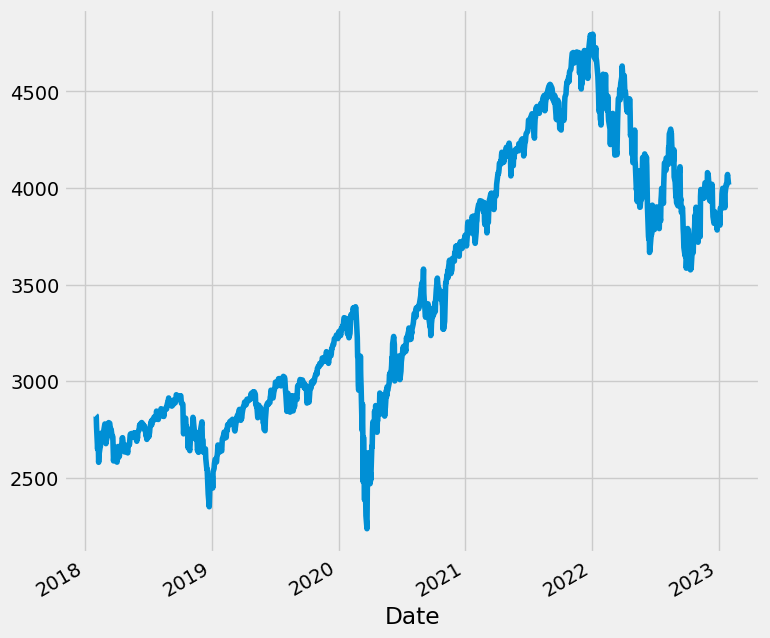

,Close
Date,
2018-01-31 00:00:00-05:00,2823.810059
2018-02-01 00:00:00-05:00,2821.979980
2018-02-02 00:00:00-05:00,2762.129883
2018-02-05 00:00:00-05:00,2648.939941
2018-02-06 00:00:00-05:00,2695.139893
...,...
2023-01-24 00:00:00-05:00,4016.949951
2023-01-25 00:00:00-05:00,4016.219971
2023-01-26 00:00:00-05:00,4060.429932


In [ ]:
SP_500_p = yf.Ticker('^gspc')
SP_500_p = SP_500_p.history(start="2018-01-31", end="2023-01-31")

SP_500_p = SP_500_p.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

plt.style.use('fivethirtyeight')
SP_500_p['Close'].plot(figsize=(8,8))
plt.show()
#SP_500_df["RSI"] = talib.RSI(SP_500_df["Close"])
SP_500_p

#Try 1, prototype code with only 1 input CNN


In [ ]:
SP_500 = yf.Ticker('^gspc')
SP_500_df = SP_500.history(start="2018-01-31", end="2023-01-31")
print(SP_500_df.columns)
SP_500_df = SP_500_df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
SP_500_df

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


,Close
Date,
2018-01-31 00:00:00-05:00,2823.810059
2018-02-01 00:00:00-05:00,2821.979980
2018-02-02 00:00:00-05:00,2762.129883
2018-02-05 00:00:00-05:00,2648.939941
2018-02-06 00:00:00-05:00,2695.139893
...,...
2023-01-24 00:00:00-05:00,4016.949951
2023-01-25 00:00:00-05:00,4016.219971
2023-01-26 00:00:00-05:00,4060.429932


Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 0.0765
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 9.4270e-04
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 7.8998e-04
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 7.4990e-04
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 7.1704e-04
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 7.0502e-04
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 6.2584e-04
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 6.0552e-04
Epoch 10/10
8/8 [==============================] - 0s 2ms/step
Train RMSE: 59.64432109073416
Test RMSE: 96.64219767114398


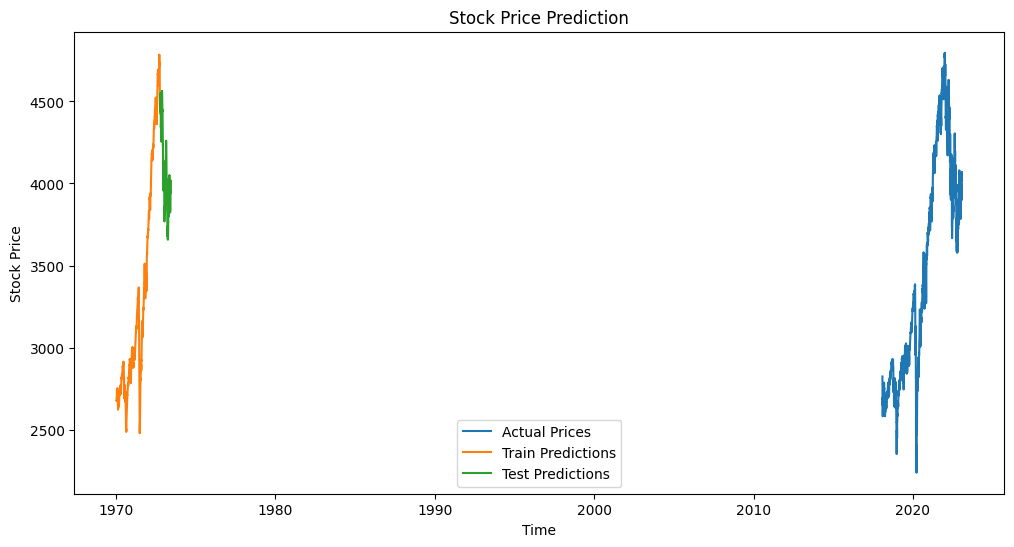

250


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error, r2_score


# Extract the closing prices
prices = SP_500_df

# Normalize the prices
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)

# Set the input sequence length
sequence_length = 10

# Create input sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length]) # เป็น sliding window 0-10, 1-11, 2-12,...
        y.append(data[i+seq_length]) # predicted 10,11,12 ไปเรื่อยๆ+
    return np.array(x), np.array(y)

train_x, train_y = create_sequences(scaled_prices, sequence_length)

# Split the data into training and testing sets
train_size = int(len(train_x) * 0.8)
train_x, test_x = train_x[:train_size], train_x[train_size:]
train_y, test_y = train_y[:train_size], train_y[train_size:]


# Reshape the input data for CNN
train_x = np.expand_dims(train_x, axis=2)
test_x = np.expand_dims(test_x, axis=2)


# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_x, train_y, epochs=10, batch_size=32)

# Make predictions
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)

# Rescale the predictions to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Calculate root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(prices[sequence_length:train_size+sequence_length], train_predictions))
test_rmse = np.sqrt(mean_squared_error(prices[train_size+sequence_length:], test_predictions))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
#test_loss, test_accuracy = model.evaluate(test_x, test_y)
#print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Actual Prices')
#plt.plot(range(sequence_length, train_size+sequence_length), train_predictions, label='Train Predictions')
#plt.plot(range(train_size+sequence_length, len(prices)), test_predictions, label='Test Predictions')
plt.plot(train_predictions, label='Train Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

print(len(test_predictions))

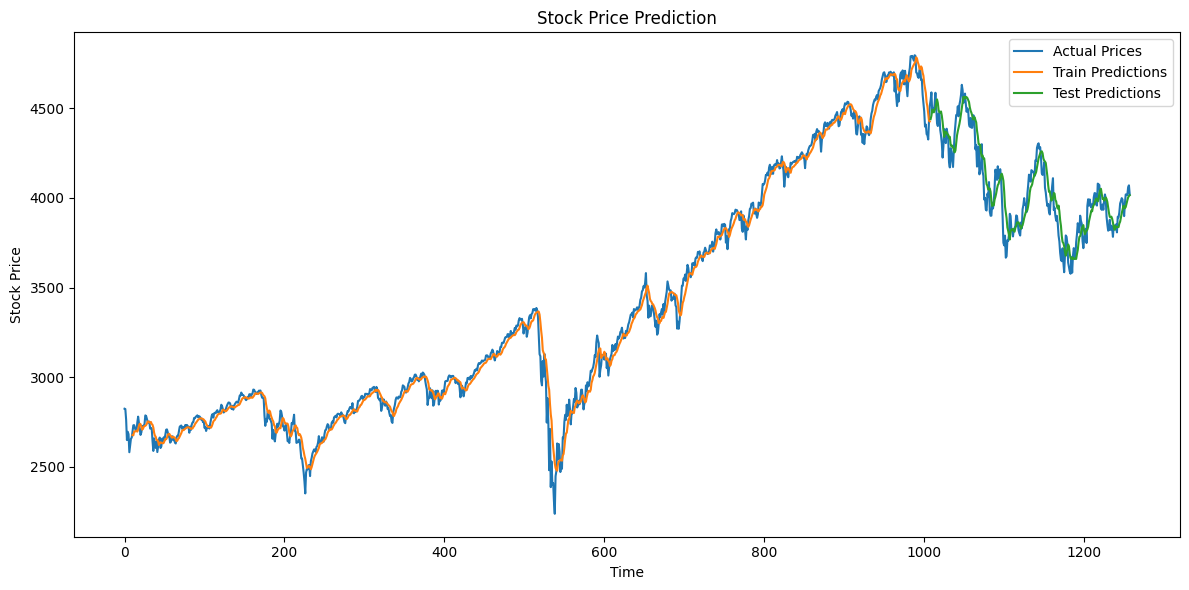

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(prices)), prices, label='Actual Prices')
plt.plot(range(sequence_length, train_size+sequence_length), train_predictions, label='Train Predictions')
plt.plot(range(train_size+sequence_length, len(prices)), test_predictions, label='Test Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.tight_layout()
plt.show()

# Try 2, multiple in put CNN

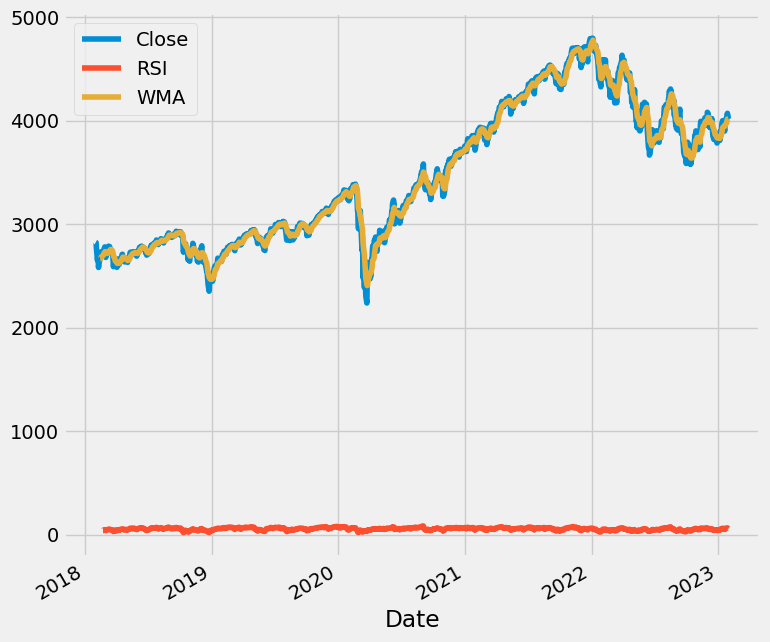

,Close,RSI,WMA
Date,,,
2018-01-31 00:00:00-05:00,2823.810059,NaN,NaN
2018-02-01 00:00:00-05:00,2821.979980,NaN,NaN
2018-02-02 00:00:00-05:00,2762.129883,NaN,NaN
2018-02-05 00:00:00-05:00,2648.939941,NaN,NaN
2018-02-06 00:00:00-05:00,2695.139893,NaN,NaN
...,...,...,...
2023-01-24 00:00:00-05:00,4016.949951,59.522692,3977.326771
2023-01-25 00:00:00-05:00,4016.219971,59.429580,3985.745486
2023-01-26 00:00:00-05:00,4060.429932,63.185637,4000.439284


In [ ]:
SP_500 = yf.Ticker('^gspc')
SP_500_df = SP_500.history(start="2018-01-31", end="2023-01-31")

SP_500_df['RSI'] = talib.RSI(SP_500_df['Close'],timeperiod=14)
SP_500_df['WMA'] = talib.WMA(SP_500_df['Close'],timeperiod=10)
#SP_500_df["stochastic_k"], SP_500_df["stochastic_d"] = talib.STOCH(SP_500_df["High"], SP_500_df["Low"], SP_500_df["Close"], fastk_period=14, slowk_period=3, slowd_period=3)
SP_500_df = SP_500_df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

plt.style.use('fivethirtyeight')
SP_500_df[['Close','RSI', 'WMA']].plot(figsize=(8,8))
plt.show()
#SP_500_df["RSI"] = talib.RSI(SP_500_df["Close"])
SP_500_df

In [ ]:
SP_500_df = SP_500_df.dropna()
#SP_500_df.to_csv('/content/drive/My Drive/Master/Diss/SP_500_df_2.csv', index = False)
SP_500_df

,Close,RSI,WMA
Date,,,
2018-02-21 00:00:00-05:00,2701.330078,38.162064,2695.792534
2018-02-22 00:00:00-05:00,2703.959961,38.498766,2700.498167
2018-02-23 00:00:00-05:00,2747.300049,43.918165,2712.678360
2018-02-26 00:00:00-05:00,2779.600098,47.622498,2727.707653
2018-02-27 00:00:00-05:00,2744.280029,44.185563,2733.405114
...,...,...,...
2023-01-24 00:00:00-05:00,4016.949951,59.522692,3977.326771
2023-01-25 00:00:00-05:00,4016.219971,59.429580,3985.745486
2023-01-26 00:00:00-05:00,4060.429932,63.185637,4000.439284


Epoch 1/50
28/28 [==============================] - 3s 35ms/step - loss: 0.0263 - mean_absolute_error: 0.1115 - val_loss: 0.0045 - val_mean_absolute_error: 0.0585
Epoch 2/50
28/28 [==============================] - 0s 11ms/step - loss: 0.0018 - mean_absolute_error: 0.0314 - val_loss: 0.0016 - val_mean_absolute_error: 0.0344
Epoch 3/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0010 - mean_absolute_error: 0.0221 - val_loss: 0.0013 - val_mean_absolute_error: 0.0284
Epoch 4/50
28/28 [==============================] - 0s 11ms/step - loss: 8.1705e-04 - mean_absolute_error: 0.0192 - val_loss: 0.0019 - val_mean_absolute_error: 0.0370
Epoch 5/50
28/28 [==============================] - 0s 12ms/step - loss: 6.8391e-04 - mean_absolute_error: 0.0173 - val_loss: 0.0011 - val_mean_absolute_error: 0.0262
Epoch 6/50
28/28 [==============================] - 0s 11ms/step - loss: 6.2892e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0011 - val_mean_absolute_error: 0.0273
Epoch 7/50

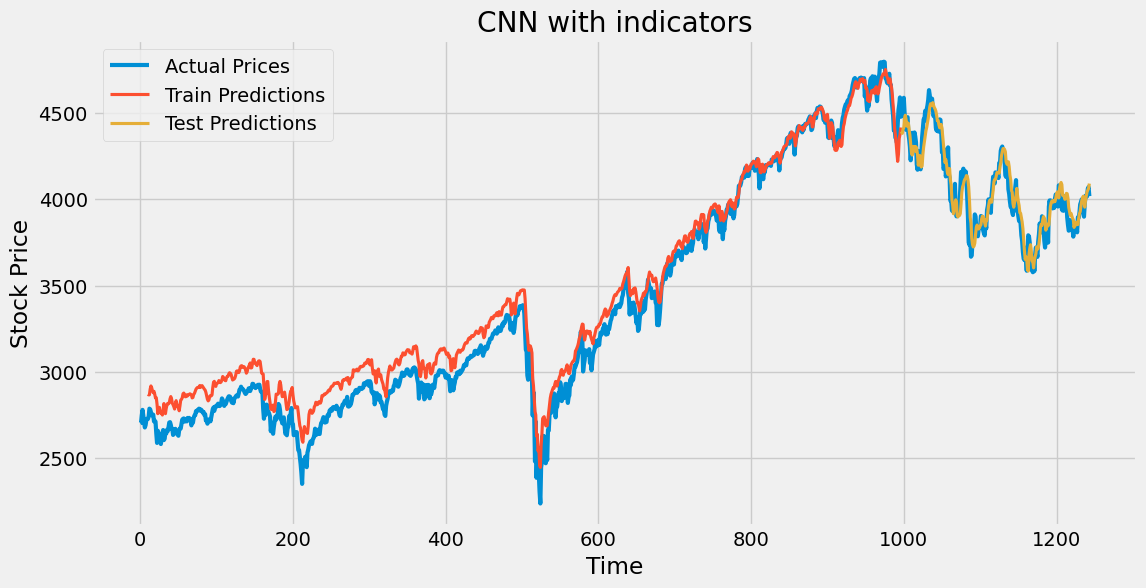

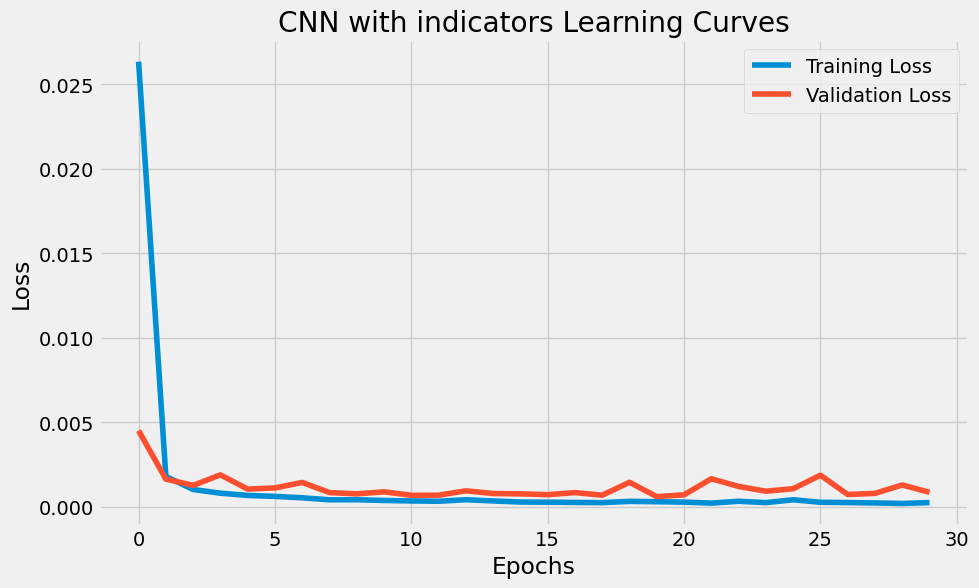

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 32)             320       
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               49408     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                      

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error, r2_score
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the learning rate
learning_rate = 0.001

# Initialize the optimizer with the learning rate
optimizer = Adam(learning_rate=learning_rate)

# Extract the closing prices
SP_500_df = SP_500_df.dropna()
prices = SP_500_df["Close"].values
features_RSI = SP_500_df['RSI'].values
features_WMA = SP_500_df['WMA'].values

scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))
scaled_RSI = scaler.fit_transform(features_RSI.reshape(-1, 1))
scaled_WMA = scaler.fit_transform(features_WMA.reshape(-1, 1))

scaled_features = np.concatenate((scaled_prices, scaled_WMA, scaled_RSI), axis=1)

# Set the input sequence length
sequence_length = 10

# Create input sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length, :]) # เป็น sliding window 0-10, 1-11, 2-12,...
        y.append(data[i+seq_length, 0]) # predicted 10,11,12 ไปเรื่อยๆ+
    return np.array(x), np.array(y)

train_x, train_y = create_sequences(scaled_features, sequence_length)

# Split the data into training and testing sets
train_size = int(len(train_x) * 0.8)
train_x, test_x = train_x[:train_size], train_x[train_size:]
train_y, test_y = train_y[:train_size], train_y[train_size:]

# Reshape the input data for CNN
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2])
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2])

# Build the CNN model

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, 3), name='conv1d_1'))
#model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', name='conv1d_2'))
#model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, name='max_pooling1d'))
#model.add(Dropout(0.2))
model.add(Flatten(name ='flatten'))
model.add(Dense(units=256, activation='relu', name= "dense_1"))
model.add(Dense(units=128, activation='relu', name= "dense_2"))
model.add(Dense(units=64, activation='relu', name= "dense_3"))
model.add(Dense(units=32, activation='relu', name= "dense_4"))
model.add(Dense(units=1, name = "dense_output"))

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
#model.fit(train_x, train_y, epochs=20, batch_size=32)
history = model.fit(train_x, train_y, epochs=50, batch_size=32,  validation_split=0.1, callbacks=[early_stopping])
# Make predictions
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)

# Rescale the predictions to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Calculate root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(prices[sequence_length:train_size+sequence_length], train_predictions))
test_rmse = np.sqrt(mean_squared_error(prices[train_size+sequence_length:], test_predictions))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate the Mean Absolute Error for the train and test sets
train_mae = mean_absolute_error(prices[sequence_length:train_size+sequence_length], train_predictions)
test_mae = mean_absolute_error(prices[train_size+sequence_length:], test_predictions)
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

train_loss = model.evaluate(train_x, train_y)

print("Train Loss:", train_loss)
#test_loss, test_accuracy = model.evaluate(test_x, test_y)
#print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Actual Prices', linewidth=3)
plt.plot(range(sequence_length, train_size+sequence_length), train_predictions, label='Train Predictions', linewidth=2.25)
plt.plot(range(train_size+sequence_length, len(prices)), test_predictions, label='Test Predictions', linewidth=2.25)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('CNN with indicators')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN with indicators Learning Curves')
plt.legend()
plt.show()

model.summary()

Epoch 1/50
29/29 [==============================] - 2s 21ms/step - loss: 0.0209 - mean_absolute_error: 0.0963 - val_loss: 0.0093 - val_mean_absolute_error: 0.0908
Epoch 2/50
29/29 [==============================] - 0s 11ms/step - loss: 0.0011 - mean_absolute_error: 0.0239 - val_loss: 0.0021 - val_mean_absolute_error: 0.0358
Epoch 3/50
29/29 [==============================] - 0s 11ms/step - loss: 7.6282e-04 - mean_absolute_error: 0.0187 - val_loss: 0.0014 - val_mean_absolute_error: 0.0284
Epoch 4/50
29/29 [==============================] - 0s 11ms/step - loss: 7.6281e-04 - mean_absolute_error: 0.0196 - val_loss: 0.0011 - val_mean_absolute_error: 0.0264
Epoch 5/50
29/29 [==============================] - 0s 11ms/step - loss: 5.7488e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0014 - val_mean_absolute_error: 0.0317
Epoch 6/50
29/29 [==============================] - 0s 13ms/step - loss: 7.4924e-04 - mean_absolute_error: 0.0203 - val_loss: 0.0010 - val_mean_absolute_error: 0.0264
Epoch 

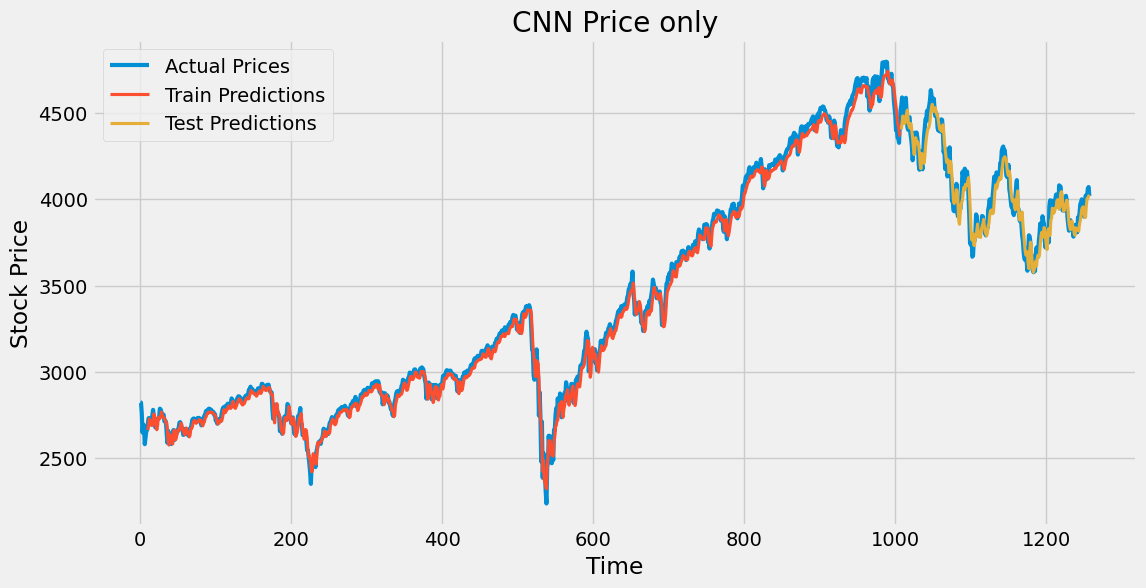

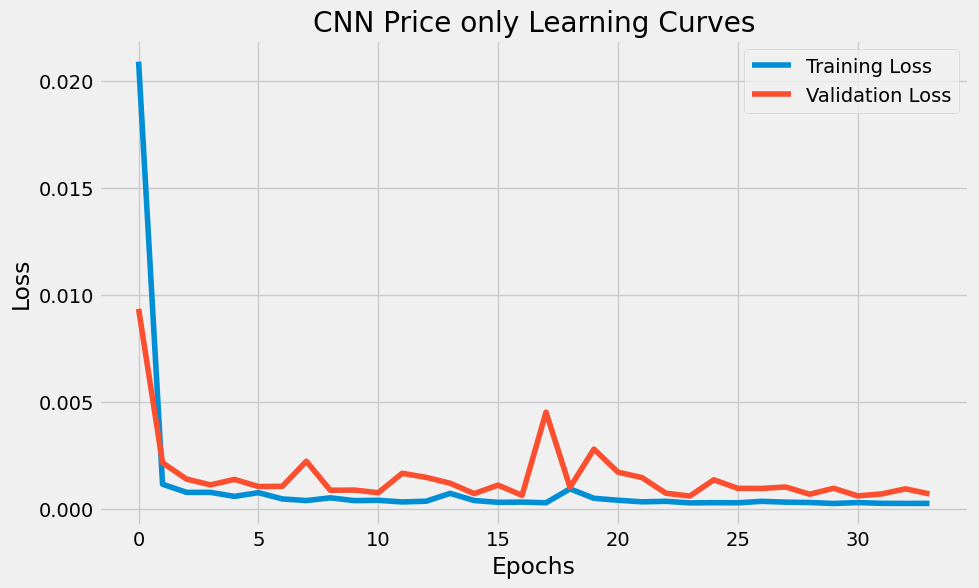

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 32)             128       
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               49408     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                      

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error, r2_score
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the learning rate
learning_rate = 0.001

# Initialize the optimizer with the learning rate
optimizer = Adam(learning_rate=learning_rate)

# Extract the closing prices
SP_500_p = SP_500_p.dropna()
prices = SP_500_p["Close"].values

scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))


#scaled_features = np.concatenate((scaled_prices), axis=1)

# Set the input sequence length
sequence_length = 10

# Create input sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length, :]) # เป็น sliding window 0-10, 1-11, 2-12,...
        y.append(data[i+seq_length, 0]) # predicted 10,11,12 ไปเรื่อยๆ+
    return np.array(x), np.array(y)

train_x, train_y = create_sequences(scaled_prices, sequence_length)

# Split the data into training and testing sets
train_size = int(len(train_x) * 0.8)
train_x, test_x = train_x[:train_size], train_x[train_size:]
train_y, test_y = train_y[:train_size], train_y[train_size:]

# Reshape the input data for CNN
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2])
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2])

# Build the CNN model

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, 1), name='conv1d_1'))
#model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', name='conv1d_2'))
#model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, name='max_pooling1d'))
#model.add(Dropout(0.2))
model.add(Flatten(name ='flatten'))
model.add(Dense(units=256, activation='relu', name= "dense_1"))
model.add(Dense(units=128, activation='relu', name= "dense_2"))
model.add(Dense(units=64, activation='relu', name= "dense_3"))
model.add(Dense(units=32, activation='relu', name= "dense_4"))
model.add(Dense(units=1, name = "dense_output"))

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
#model.fit(train_x, train_y, epochs=20, batch_size=32)
history = model.fit(train_x, train_y, epochs=50, batch_size=32,  validation_split=0.1, callbacks=[early_stopping])
# Make predictions
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)

# Rescale the predictions to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Calculate root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(prices[sequence_length:train_size+sequence_length], train_predictions))
test_rmse = np.sqrt(mean_squared_error(prices[train_size+sequence_length:], test_predictions))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate the Mean Absolute Error for the train and test sets
train_mae = mean_absolute_error(prices[sequence_length:train_size+sequence_length], train_predictions)
test_mae = mean_absolute_error(prices[train_size+sequence_length:], test_predictions)
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

train_loss = model.evaluate(train_x, train_y)

print("Train Loss:", train_loss)
#test_loss, test_accuracy = model.evaluate(test_x, test_y)
#print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Actual Prices', linewidth=3)
plt.plot(range(sequence_length, train_size+sequence_length), train_predictions, label='Train Predictions', linewidth=2.25)
plt.plot(range(train_size+sequence_length, len(prices)), test_predictions, label='Test Predictions', linewidth=2.25)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('CNN Price only')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Price only Learning Curves')
plt.legend()
plt.show()


model.summary()

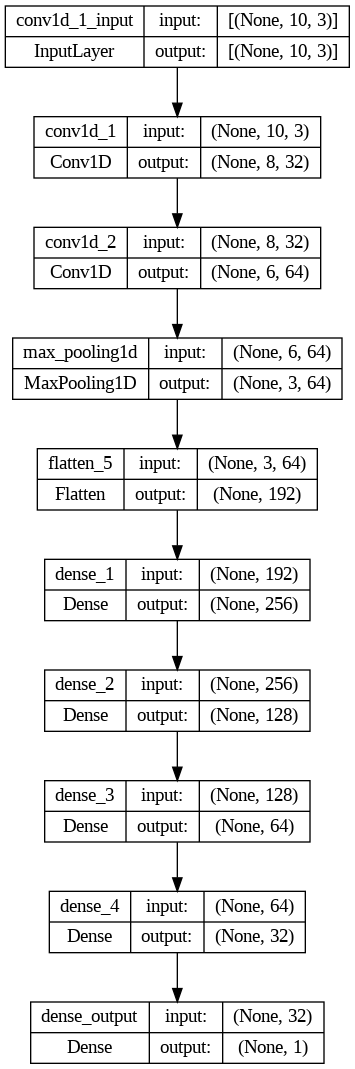

In [ ]:
# Plot the model
plot_model(model, to_file='model_plot_cnn.png', show_shapes=True, show_layer_names=True)

# LSTM multiple input


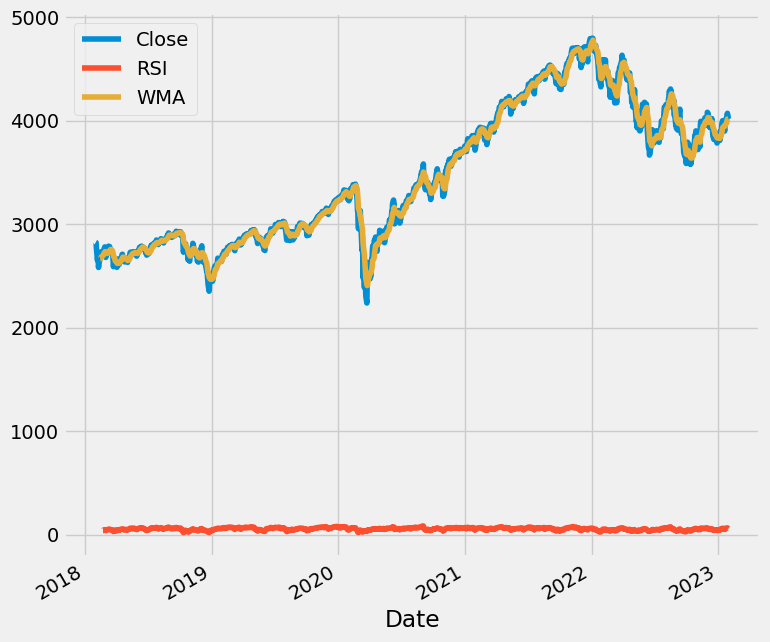

,Close,RSI,WMA
Date,,,
2018-01-31 00:00:00-05:00,2823.810059,NaN,NaN
2018-02-01 00:00:00-05:00,2821.979980,NaN,NaN
2018-02-02 00:00:00-05:00,2762.129883,NaN,NaN
2018-02-05 00:00:00-05:00,2648.939941,NaN,NaN
2018-02-06 00:00:00-05:00,2695.139893,NaN,NaN
...,...,...,...
2023-01-24 00:00:00-05:00,4016.949951,59.522692,3977.326771
2023-01-25 00:00:00-05:00,4016.219971,59.429580,3985.745486
2023-01-26 00:00:00-05:00,4060.429932,63.185637,4000.439284


In [ ]:
SP_500 = yf.Ticker('^gspc')
SP_500_df = SP_500.history(start="2018-01-31", end="2023-01-31")

SP_500_df['RSI'] = talib.RSI(SP_500_df['Close'],timeperiod=14)
SP_500_df['WMA'] = talib.WMA(SP_500_df['Close'],timeperiod=10)
SP_500_df = SP_500_df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

plt.style.use('fivethirtyeight')
SP_500_df[['Close','RSI', 'WMA']].plot(figsize=(8,8))
plt.show()
SP_500_df

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping

df = SP_500_df.dropna()
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Generate sequences for training
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data) - seq_length):
        x = data[i:(i+seq_length), :]
        y = data[i+seq_length, 0]  # The target output is the "Close" price
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

seq_length = 10  # Use 10 days of previous data to predict the next day
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(seq_length, 3)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(1))


# Train the model
#model.fit(X_train, y_train, epochs=50, batch_size=32,  validation_split=0.1, callbacks=[early_stopping])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,  validation_split=0.1, callbacks=[early_stopping])

# Fit the model
#model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/50
28/28 [==============================] - 15s 182ms/step - loss: 0.0254 - mean_absolute_error: 0.1109 - val_loss: 0.0023 - val_mean_absolute_error: 0.0399
Epoch 2/50
28/28 [==============================] - 2s 83ms/step - loss: 0.0025 - mean_absolute_error: 0.0364 - val_loss: 0.0021 - val_mean_absolute_error: 0.0351
Epoch 3/50
28/28 [==============================] - 2s 78ms/step - loss: 0.0014 - mean_absolute_error: 0.0267 - val_loss: 0.0022 - val_mean_absolute_error: 0.0361
Epoch 4/50
28/28 [==============================] - 2s 79ms/step - loss: 0.0015 - mean_absolute_error: 0.0271 - val_loss: 0.0030 - val_mean_absolute_error: 0.0418
Epoch 5/50
28/28 [==============================] - 3s 90ms/step - loss: 0.0014 - mean_absolute_error: 0.0266 - val_loss: 0.0017 - val_mean_absolute_error: 0.0344
Epoch 6/50
28/28 [==============================] - 2s 65ms/step - loss: 0.0014 - mean_absolute_error: 0.0269 - val_loss: 0.0023 - val_mean_absolute_error: 0.0363
Epoch 7/50
28/28 [==

8/8 [==============================] - 0s 10ms/step


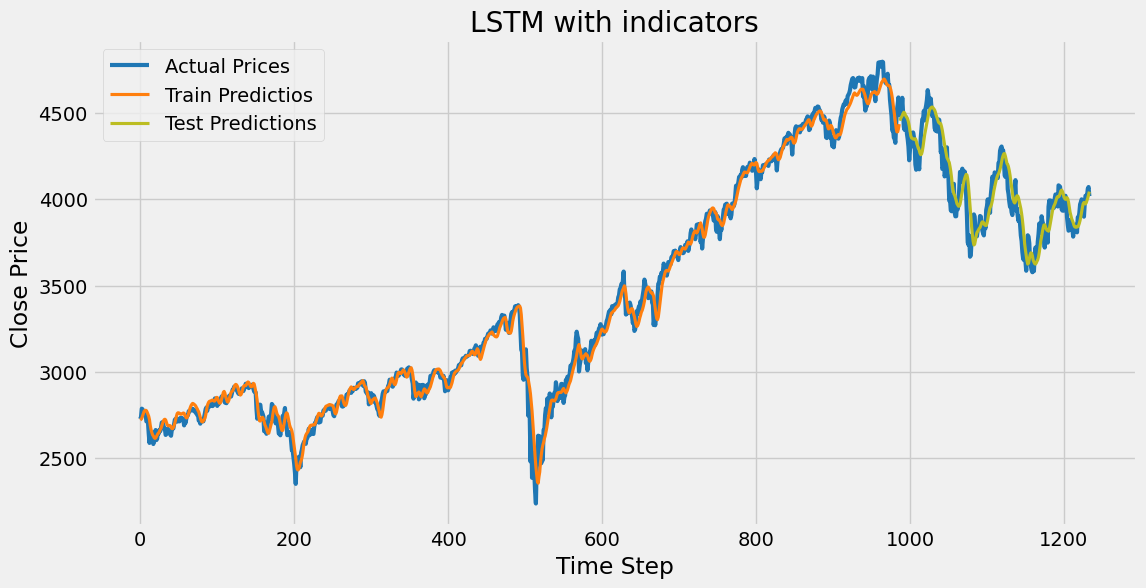

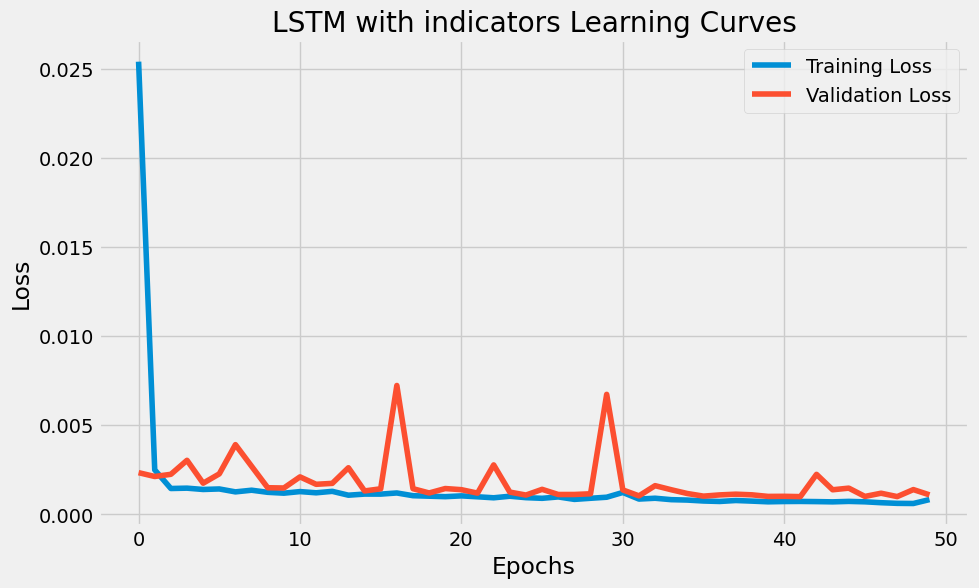

Train RMSE: 58.90335544880148, Train MAE: 41.75111458729104
Test RMSE: 104.28140585608887, Test MAE: 83.48884860513664


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Invert the scaling for the predictions
y_train_pred_inv = scaler.inverse_transform(np.concatenate([y_train_pred, np.zeros_like(y_train_pred), np.zeros_like(y_train_pred)], axis=1))[:, 0]
y_test_pred_inv = scaler.inverse_transform(np.concatenate([y_test_pred, np.zeros_like(y_test_pred), np.zeros_like(y_test_pred)], axis=1))[:, 0]

# Invert the scaling for the actual values
y_train_inv = scaler.inverse_transform(np.concatenate([y_train.reshape(-1, 1), X_train[:, -1, 1:]], axis=1))[:, 0]
y_test_inv = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), X_test[:, -1, 1:]], axis=1))[:, 0]

# Plot the train set predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label='Actual Prices', color = '#1f77b4', linewidth=3)
plt.plot(y_train_pred_inv, label='Train Predictios', color='#ff7f0e',linewidth=2.25)

# Plot the test set predictions, offset by the size of the train set
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_inv,color = '#1f77b4', linewidth=3)
plt.plot(np.arange(len(y_train_pred_inv), len(y_train_pred_inv) + len(y_test_pred_inv)), y_test_pred_inv, label='Test Predictions',
         color='#bcbd22',linewidth=2.25)

plt.title('LSTM with indicators')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM with indicators Learning Curves')
plt.legend()
plt.show()

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

# Calculate MAE
train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)

print(f'Train RMSE: {train_rmse}, Train MAE: {train_mae}')
print(f'Test RMSE: {test_rmse}, Test MAE: {test_mae}')

## USEABLE, SAME AS PREVIOUS MODEL OUTPUT

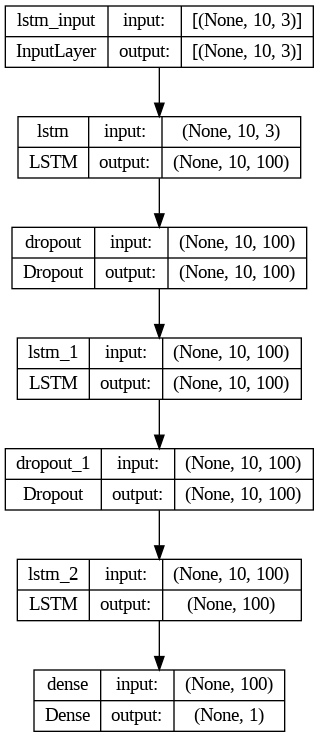

In [ ]:
# Plot the model
plot_model(model, to_file='model_plot_mlp.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping

df = SP_500_p.dropna()
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Generate sequences for training
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data) - seq_length):
        x = data[i:(i+seq_length), :]
        y = data[i+seq_length, 0]  # The target output is the "Close" price
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

seq_length = 10  # Use 10 days of previous data to predict the next day
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(1))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,  validation_split=0.1, callbacks=[early_stopping])





Epoch 1/50
29/29 [==============================] - 17s 163ms/step - loss: 0.0322 - mean_absolute_error: 0.1192 - val_loss: 0.0069 - val_mean_absolute_error: 0.0758
Epoch 2/50
29/29 [==============================] - 2s 54ms/step - loss: 0.0016 - mean_absolute_error: 0.0297 - val_loss: 0.0016 - val_mean_absolute_error: 0.0321
Epoch 3/50
29/29 [==============================] - 2s 66ms/step - loss: 0.0013 - mean_absolute_error: 0.0253 - val_loss: 0.0016 - val_mean_absolute_error: 0.0322
Epoch 4/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0012 - mean_absolute_error: 0.0254 - val_loss: 0.0018 - val_mean_absolute_error: 0.0335
Epoch 5/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0013 - mean_absolute_error: 0.0251 - val_loss: 0.0040 - val_mean_absolute_error: 0.0505
Epoch 6/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0012 - mean_absolute_error: 0.0241 - val_loss: 0.0020 - val_mean_absolute_error: 0.0344
Epoch 7/50
29/29 [==

8/8 [==============================] - 0s 11ms/step


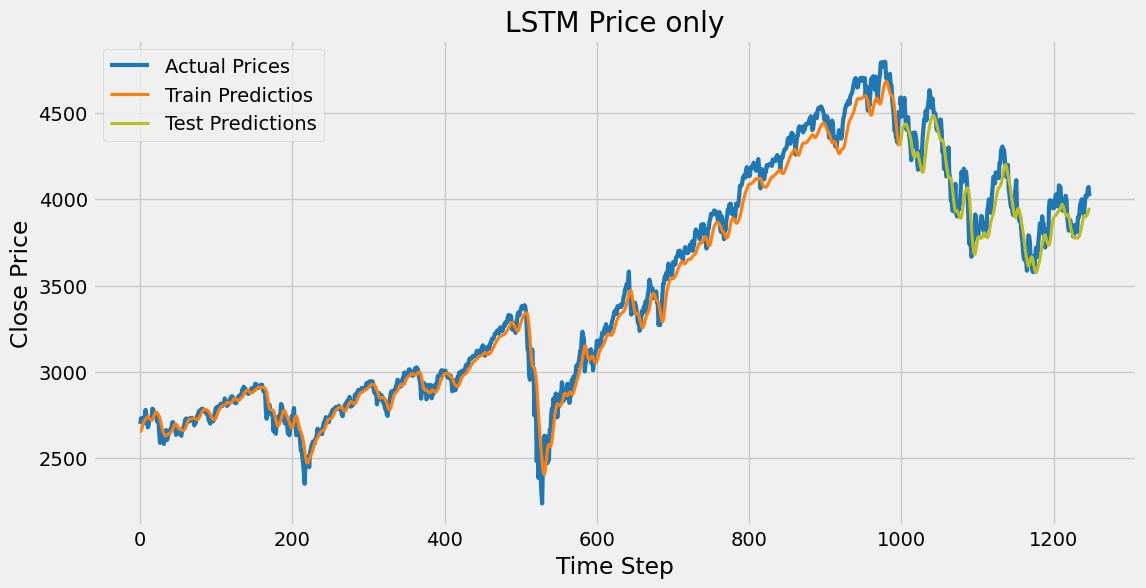

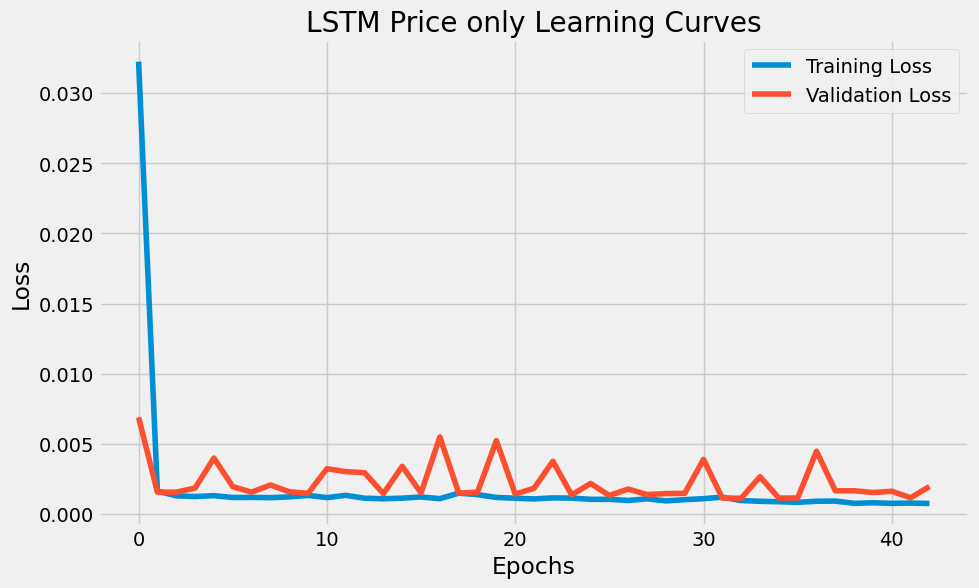

Train RMSE: 78.34094385190554, Train MAE: 60.05000088066758
Test RMSE: 114.16468900349425, Test MAE: 94.3106513671875


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Invert the scaling for the predictions
y_train_pred_inv = scaler.inverse_transform(np.concatenate([y_train_pred, np.zeros_like(y_train_pred), np.zeros_like(y_train_pred)], axis=1))[:, 0]
y_test_pred_inv = scaler.inverse_transform(np.concatenate([y_test_pred, np.zeros_like(y_test_pred), np.zeros_like(y_test_pred)], axis=1))[:, 0]

# Invert the scaling for the actual values
y_train_inv = scaler.inverse_transform(np.concatenate([y_train.reshape(-1, 1), X_train[:, -1, 1:]], axis=1))[:, 0]
y_test_inv = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), X_test[:, -1, 1:]], axis=1))[:, 0]

# Plot the train set predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label='Actual Prices', color = '#1f77b4', linewidth=3)
plt.plot(y_train_pred_inv, label='Train Predictios', color='#ff7f0e',linewidth=2.25)

# Plot the test set predictions, offset by the size of the train set
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_inv,color = '#1f77b4', linewidth=3)
plt.plot(np.arange(len(y_train_pred_inv), len(y_train_pred_inv) + len(y_test_pred_inv)), y_test_pred_inv, label='Test Predictions', color='#bcbd22',linewidth=2.25)


plt.title('LSTM Price only')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Price only Learning Curves')
plt.legend()
plt.show()

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

# Calculate MAE
train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)

print(f'Train RMSE: {train_rmse}, Train MAE: {train_mae}')
print(f'Test RMSE: {test_rmse}, Test MAE: {test_mae}')

## USEABLE, SAME AS PREVIOUS MODEL OUTPUT

# Simple MLP model


Epoch 1/50
28/28 [==============================] - 1s 10ms/step - loss: 0.0121 - mean_absolute_error: 0.0647 - val_loss: 0.0035 - val_mean_absolute_error: 0.0521
Epoch 2/50
28/28 [==============================] - 0s 5ms/step - loss: 7.6148e-04 - mean_absolute_error: 0.0192 - val_loss: 0.0025 - val_mean_absolute_error: 0.0431
Epoch 3/50
28/28 [==============================] - 0s 4ms/step - loss: 5.8479e-04 - mean_absolute_error: 0.0162 - val_loss: 0.0011 - val_mean_absolute_error: 0.0265
Epoch 4/50
28/28 [==============================] - 0s 4ms/step - loss: 5.4665e-04 - mean_absolute_error: 0.0161 - val_loss: 0.0029 - val_mean_absolute_error: 0.0482
Epoch 5/50
28/28 [==============================] - 0s 5ms/step - loss: 5.6910e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0027 - val_mean_absolute_error: 0.0460
Epoch 6/50
28/28 [==============================] - 0s 4ms/step - loss: 4.4187e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0013 - val_mean_absolute_error: 0.0284
Epoch 7

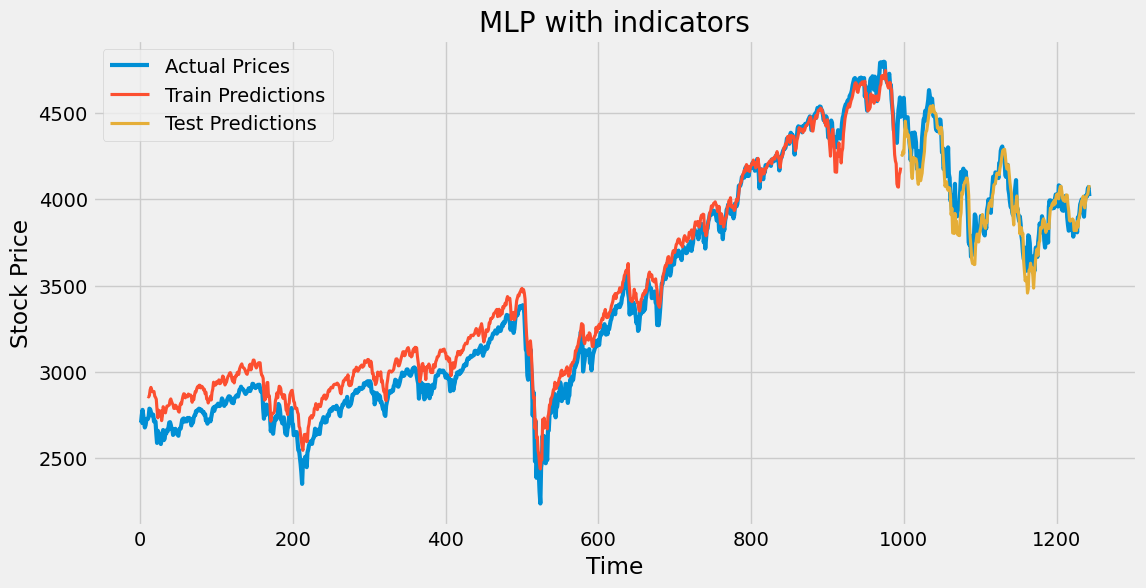

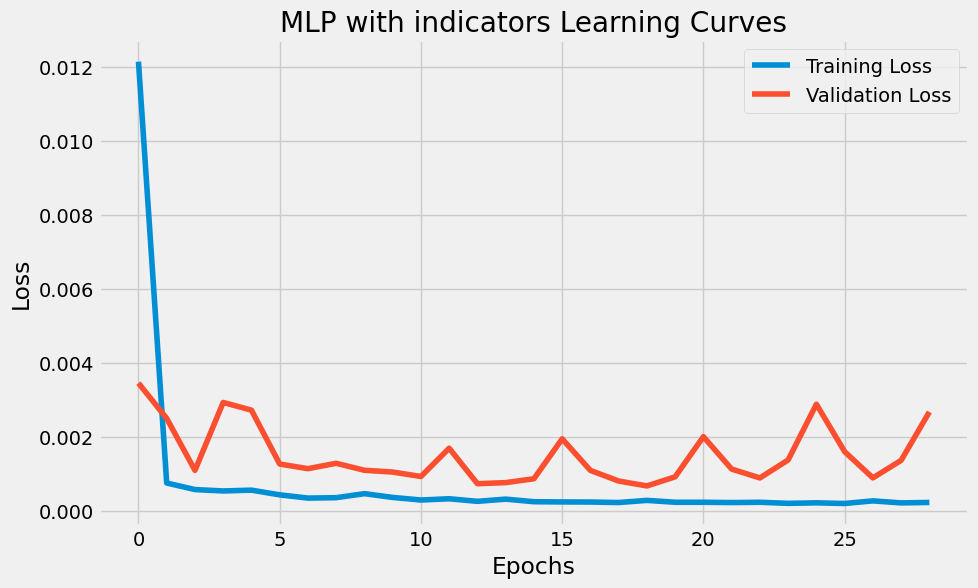

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               7936      
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_output (Dense)        (None, 1)                 33        
                                                                 
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the learning rate
learning_rate = 0.001

# Initialize the optimizer with the learning rate
optimizer = Adam(learning_rate=learning_rate)

# Extract the closing prices
SP_500_df = SP_500_df.dropna()
prices = SP_500_df["Close"].values
features_RSI = SP_500_df['RSI'].values
features_WMA = SP_500_df['WMA'].values

scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))
scaled_RSI = scaler.fit_transform(features_RSI.reshape(-1, 1))
scaled_WMA = scaler.fit_transform(features_WMA.reshape(-1, 1))

scaled_features = np.concatenate((scaled_prices, scaled_WMA, scaled_RSI), axis=1)

# Set the input sequence length
sequence_length = 10

# Create input sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length, :]) # เป็น sliding window 0-10, 1-11, 2-12,...
        y.append(data[i+seq_length, 0]) # predicted 10,11,12 ไปเรื่อยๆ+
    return np.array(x), np.array(y)

train_x, train_y = create_sequences(scaled_features, sequence_length)

# Split the data into training and testing sets
train_size = int(len(train_x) * 0.8)
train_x, test_x = train_x[:train_size], train_x[train_size:]
train_y, test_y = train_y[:train_size], train_y[train_size:]

# Flatten the input data for MLP
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1]*train_x.shape[2])
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1]*test_x.shape[2])

# Build the MLP model

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(train_x.shape[1],), name='dense_1'))
model.add(Dense(128, activation='relu', name='dense_2'))
model.add(Dense(64, activation='relu', name='dense_3'))
model.add(Dense(32, activation='relu', name='dense_4'))
model.add(Dense(1, name='dense_output'))

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
#model.fit(train_x, train_y, epochs=20, batch_size=32)
history = model.fit(train_x, train_y, epochs=50, batch_size=32,  validation_split=0.1, callbacks=[early_stopping])

# Make predictions
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)

# Rescale the predictions to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Calculate root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(prices[sequence_length:train_size+sequence_length], train_predictions))
test_rmse = np.sqrt(mean_squared_error(prices[train_size+sequence_length:], test_predictions))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate the Mean Absolute Error for the train and test sets
train_mae = mean_absolute_error(prices[sequence_length:train_size+sequence_length], train_predictions)
test_mae = mean_absolute_error(prices[train_size+sequence_length:], test_predictions)
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

train_loss = model.evaluate(train_x, train_y)

print("Train Loss:", train_loss)
#test_loss, test_accuracy = model.evaluate(test_x, test_y)
#print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Actual Prices',linewidth=3)
plt.plot(range(sequence_length, train_size+sequence_length), train_predictions, label='Train Predictions', linewidth=2.25)
plt.plot(range(train_size+sequence_length, len(prices)), test_predictions, label='Test Predictions', linewidth=2.25)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('MLP with indicators')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP with indicators Learning Curves')
plt.legend()
plt.show()

model.summary()



Epoch 1/50
29/29 [==============================] - 1s 9ms/step - loss: 0.0144 - mean_absolute_error: 0.0722 - val_loss: 0.0011 - val_mean_absolute_error: 0.0274
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 7.5868e-04 - mean_absolute_error: 0.0186 - val_loss: 0.0014 - val_mean_absolute_error: 0.0287
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 5.3320e-04 - mean_absolute_error: 0.0158 - val_loss: 7.0040e-04 - val_mean_absolute_error: 0.0203
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: 3.7568e-04 - mean_absolute_error: 0.0133 - val_loss: 0.0015 - val_mean_absolute_error: 0.0328
Epoch 5/50
29/29 [==============================] - 0s 5ms/step - loss: 3.3275e-04 - mean_absolute_error: 0.0125 - val_loss: 8.9014e-04 - val_mean_absolute_error: 0.0243
Epoch 6/50
29/29 [==============================] - 0s 5ms/step - loss: 3.0987e-04 - mean_absolute_error: 0.0122 - val_loss: 4.5261e-04 - val_mean_absolute_error: 0.0

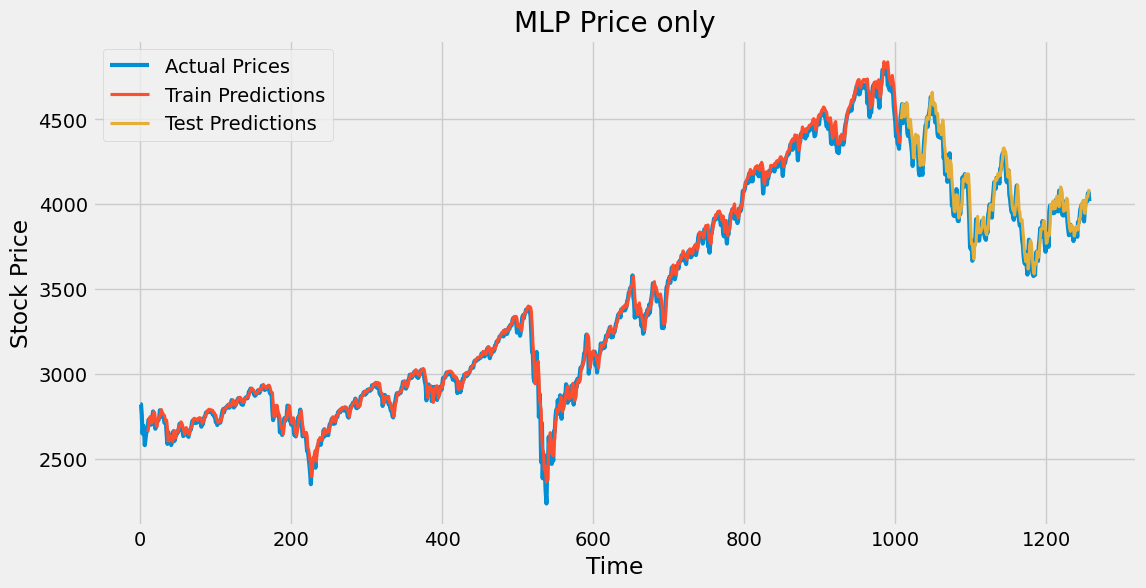

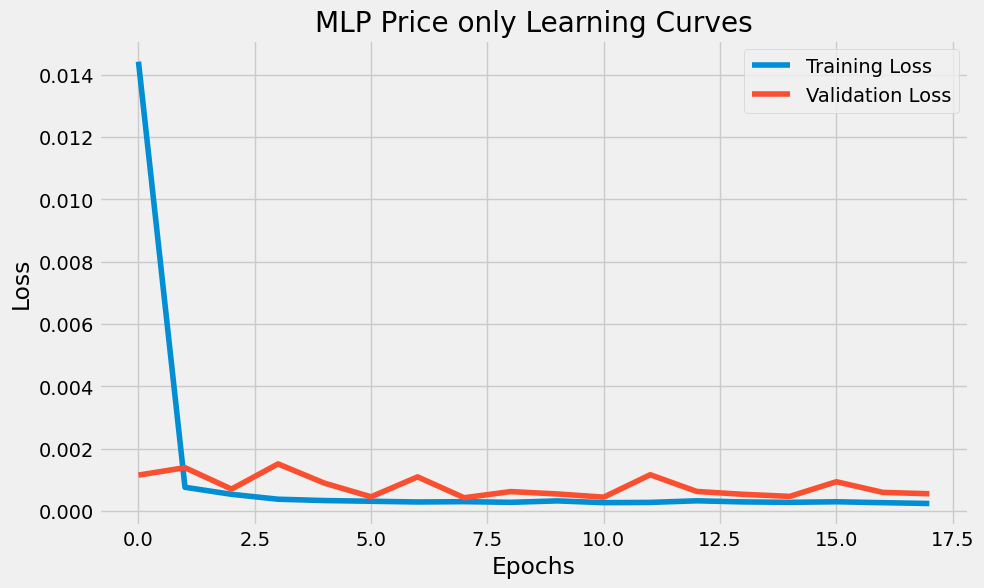

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               2816      
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_output (Dense)        (None, 1)                 33        
                                                                 
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the learning rate
learning_rate = 0.001

# Initialize the optimizer with the learning rate
optimizer = Adam(learning_rate=learning_rate)

# Extract the closing prices
SP_500_p = SP_500_p.dropna()
prices = SP_500_p["Close"].values


scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))


# Set the input sequence length
sequence_length = 10

# Create input sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length, :]) # เป็น sliding window 0-10, 1-11, 2-12,...
        y.append(data[i+seq_length, 0]) # predicted 10,11,12 ไปเรื่อยๆ+
    return np.array(x), np.array(y)

train_x, train_y = create_sequences(scaled_prices, sequence_length)

# Split the data into training and testing sets
train_size = int(len(train_x) * 0.8)
train_x, test_x = train_x[:train_size], train_x[train_size:]
train_y, test_y = train_y[:train_size], train_y[train_size:]

# Flatten the input data for MLP
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1]*train_x.shape[2])
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1]*test_x.shape[2])

# Build the MLP model

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(train_x.shape[1],), name='dense_1'))
model.add(Dense(128, activation='relu', name='dense_2'))
model.add(Dense(64, activation='relu', name='dense_3'))
model.add(Dense(32, activation='relu', name='dense_4'))
model.add(Dense(1, name='dense_output'))

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
#model.fit(train_x, train_y, epochs=20, batch_size=32)
history = model.fit(train_x, train_y, epochs=50, batch_size=32,  validation_split=0.1, callbacks=[early_stopping])

# Make predictions
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)

# Rescale the predictions to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Calculate root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(prices[sequence_length:train_size+sequence_length], train_predictions))
test_rmse = np.sqrt(mean_squared_error(prices[train_size+sequence_length:], test_predictions))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate the Mean Absolute Error for the train and test sets
train_mae = mean_absolute_error(prices[sequence_length:train_size+sequence_length], train_predictions)
test_mae = mean_absolute_error(prices[train_size+sequence_length:], test_predictions)
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

train_loss = model.evaluate(train_x, train_y)

print("Train Loss:", train_loss)
#test_loss, test_accuracy = model.evaluate(test_x, test_y)
#print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Actual Prices', linewidth=3)
plt.plot(range(sequence_length, train_size+sequence_length), train_predictions, label='Train Predictions', linewidth=2.25)
plt.plot(range(train_size+sequence_length, len(prices)), test_predictions, label='Test Predictions', linewidth=2.25)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('MLP Price only')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP Price only Learning Curves')
plt.legend()
plt.show()


model.summary()



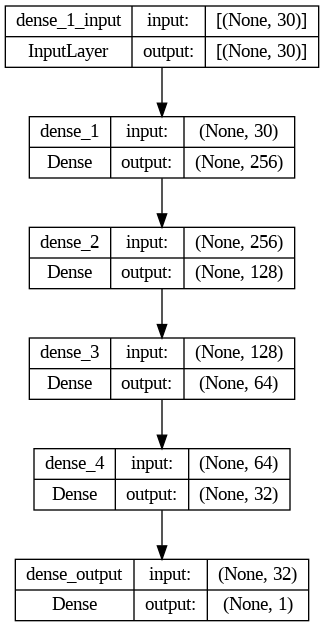

In [ ]:
# Plot the model
plot_model(model, to_file='model_plot_mlp.png', show_shapes=True, show_layer_names=True)

# Simple RNN


Epoch 1/50
31/31 [==============================] - 3s 22ms/step - loss: 0.0043 - mean_absolute_error: 0.0444 - val_loss: 0.0012 - val_mean_absolute_error: 0.0281
Epoch 2/50
31/31 [==============================] - 0s 15ms/step - loss: 6.7149e-04 - mean_absolute_error: 0.0191 - val_loss: 0.0011 - val_mean_absolute_error: 0.0277
Epoch 3/50
31/31 [==============================] - 0s 15ms/step - loss: 4.6110e-04 - mean_absolute_error: 0.0151 - val_loss: 8.1971e-04 - val_mean_absolute_error: 0.0233
Epoch 4/50
31/31 [==============================] - 0s 15ms/step - loss: 3.6569e-04 - mean_absolute_error: 0.0132 - val_loss: 8.4262e-04 - val_mean_absolute_error: 0.0235
Epoch 5/50
31/31 [==============================] - 0s 15ms/step - loss: 3.4910e-04 - mean_absolute_error: 0.0130 - val_loss: 0.0010 - val_mean_absolute_error: 0.0267
Epoch 6/50
31/31 [==============================] - 0s 16ms/step - loss: 3.7102e-04 - mean_absolute_error: 0.0135 - val_loss: 9.7422e-04 - val_mean_absolute_erro

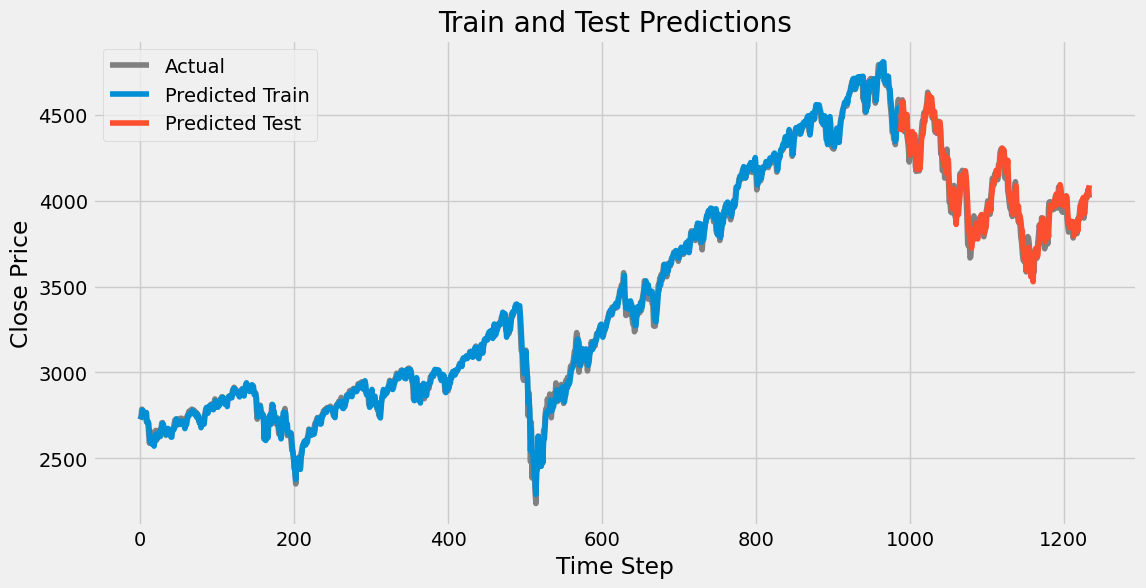

Train RMSE: 32.62556135395346, Train MAE: 23.823578592008616
Test RMSE: 68.6194163038259, Test MAE: 55.19158120097418


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the learning rate
learning_rate = 0.001

# Initialize the optimizer with the learning rate
optimizer = Adam(learning_rate=learning_rate)

df = SP_500_df.dropna()
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Generate sequences for training
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data) - seq_length):
        x = data[i:(i+seq_length), :]
        y = data[i+seq_length, 0]  # The target output is the "Close" price
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

seq_length = 10  # Use 10 days of previous data to predict the next day
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(seq_length, 3)))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer= optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Invert the scaling for the predictions
y_train_pred_inv = scaler.inverse_transform(np.concatenate([y_train_pred, np.zeros_like(y_train_pred), np.zeros_like(y_train_pred)], axis=1))[:, 0]
y_test_pred_inv = scaler.inverse_transform(np.concatenate([y_test_pred, np.zeros_like(y_test_pred), np.zeros_like(y_test_pred)], axis=1))[:, 0]

# Invert the scaling for the actual values
y_train_inv = scaler.inverse_transform(np.concatenate([y_train.reshape(-1, 1), X_train[:, -1, 1:]], axis=1))[:, 0]
y_test_inv = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), X_test[:, -1, 1:]], axis=1))[:, 0]

# Plot the train set predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label='Actual', color = 'grey')
plt.plot(y_train_pred_inv, label='Predicted Train')

# Plot the test set predictions, offset by the size of the train set
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_inv,color = 'grey')
plt.plot(np.arange(len(y_train_pred_inv), len(y_train_pred_inv) + len(y_test_pred_inv)), y_test_pred_inv, label='Predicted Test')

plt.title('Train and Test Predictions')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.show()
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

# Calculate MAE
train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)

print(f'Train RMSE: {train_rmse}, Train MAE: {train_mae}')
print(f'Test RMSE: {test_rmse}, Test MAE: {test_mae}')

## USEABLE, SAME AS PREVIOUS MODEL OUTPUT



Epoch 1/50
31/31 [==============================] - 7s 40ms/step - loss: 0.0185 - mean_absolute_error: 0.0779 - val_loss: 0.0029 - val_mean_absolute_error: 0.0458
Epoch 2/50
31/31 [==============================] - 0s 16ms/step - loss: 7.5704e-04 - mean_absolute_error: 0.0199 - val_loss: 0.0012 - val_mean_absolute_error: 0.0285
Epoch 3/50
31/31 [==============================] - 0s 16ms/step - loss: 4.7646e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0011 - val_mean_absolute_error: 0.0266
Epoch 4/50
31/31 [==============================] - 1s 17ms/step - loss: 4.0549e-04 - mean_absolute_error: 0.0139 - val_loss: 8.9628e-04 - val_mean_absolute_error: 0.0248
Epoch 5/50
31/31 [==============================] - 1s 18ms/step - loss: 3.4192e-04 - mean_absolute_error: 0.0129 - val_loss: 8.9357e-04 - val_mean_absolute_error: 0.0241
Epoch 6/50
31/31 [==============================] - 1s 17ms/step - loss: 3.3703e-04 - mean_absolute_error: 0.0128 - val_loss: 8.6082e-04 - val_mean_absolute_erro

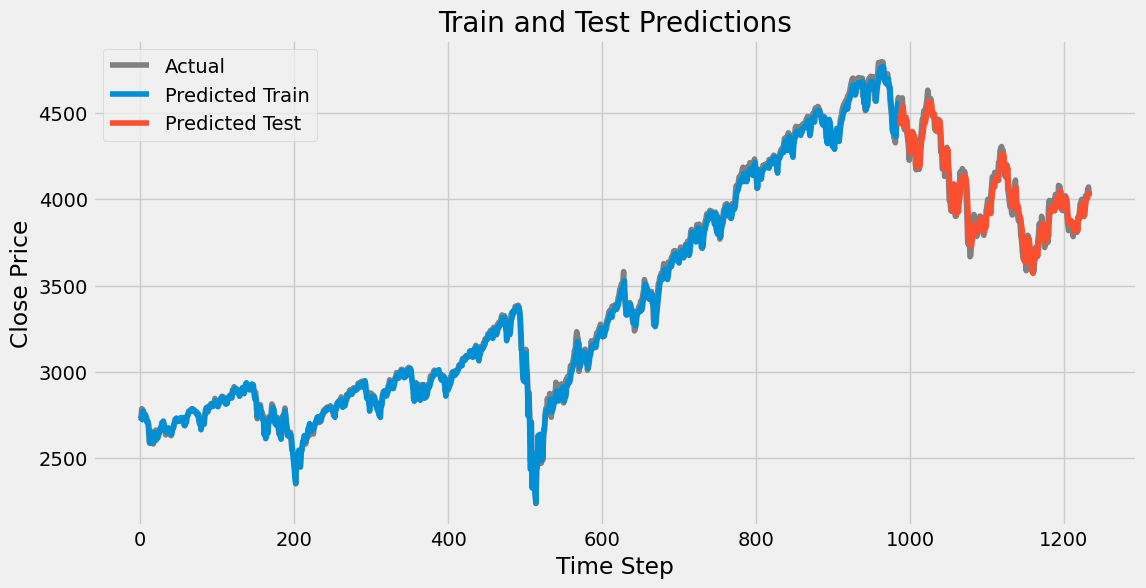

Train RMSE: 32.768209750468266, Train MAE: 25.203189312626645
Test RMSE: 67.50613235442695, Test MAE: 54.850104575215084


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

df = SP_500_df.dropna()
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Generate sequences for training
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data) - seq_length):
        x = data[i:(i+seq_length), :]
        y = data[i+seq_length, 0]  # The target output is the "Close" price
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

seq_length = 10  # Use 10 days of previous data to predict the next day
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 3)))
model.add(SimpleRNN(100, activation='relu', return_sequences=True))
model.add(SimpleRNN(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Invert the scaling for the predictions
y_train_pred_inv = scaler.inverse_transform(np.concatenate([y_train_pred, np.zeros_like(y_train_pred), np.zeros_like(y_train_pred)], axis=1))[:, 0]
y_test_pred_inv = scaler.inverse_transform(np.concatenate([y_test_pred, np.zeros_like(y_test_pred), np.zeros_like(y_test_pred)], axis=1))[:, 0]

# Invert the scaling for the actual values
y_train_inv = scaler.inverse_transform(np.concatenate([y_train.reshape(-1, 1), X_train[:, -1, 1:]], axis=1))[:, 0]
y_test_inv = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), X_test[:, -1, 1:]], axis=1))[:, 0]

# Plot the train set predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label='Actual', color = 'grey')
plt.plot(y_train_pred_inv, label='Predicted Train')

# Plot the test set predictions, offset by the size of the train set
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_inv,color = 'grey')
plt.plot(np.arange(len(y_train_pred_inv), len(y_train_pred_inv) + len(y_test_pred_inv)), y_test_pred_inv, label='Predicted Test')

plt.title('Train and Test Predictions')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.show()
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

# Calculate MAE
train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)

print(f'Train RMSE: {train_rmse}, Train MAE: {train_mae}')
print(f'Test RMSE: {test_rmse}, Test MAE: {test_mae}')

#TOO COMPLEX, OVERTRAINED

# GRU model


Epoch 1/50
28/28 [==============================] - 7s 42ms/step - loss: 0.0597 - mean_absolute_error: 0.1840 - val_loss: 0.0658 - val_mean_absolute_error: 0.2548
Epoch 2/50
28/28 [==============================] - 1s 33ms/step - loss: 0.0045 - mean_absolute_error: 0.0476 - val_loss: 0.0015 - val_mean_absolute_error: 0.0313
Epoch 3/50
28/28 [==============================] - 1s 40ms/step - loss: 6.7883e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0010 - val_mean_absolute_error: 0.0255
Epoch 4/50
28/28 [==============================] - 1s 35ms/step - loss: 5.2866e-04 - mean_absolute_error: 0.0157 - val_loss: 9.4717e-04 - val_mean_absolute_error: 0.0246
Epoch 5/50
28/28 [==============================] - 1s 51ms/step - loss: 4.7598e-04 - mean_absolute_error: 0.0147 - val_loss: 9.1136e-04 - val_mean_absolute_error: 0.0241
Epoch 6/50
28/28 [==============================] - 2s 62ms/step - loss: 4.6470e-04 - mean_absolute_error: 0.0147 - val_loss: 8.7302e-04 - val_mean_absolute_error: 0

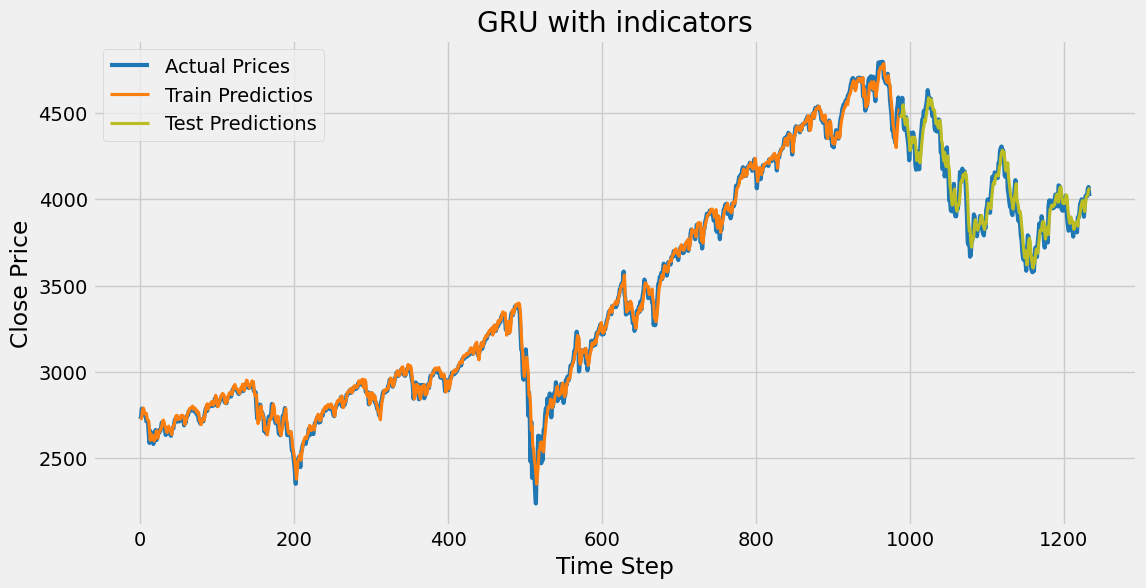

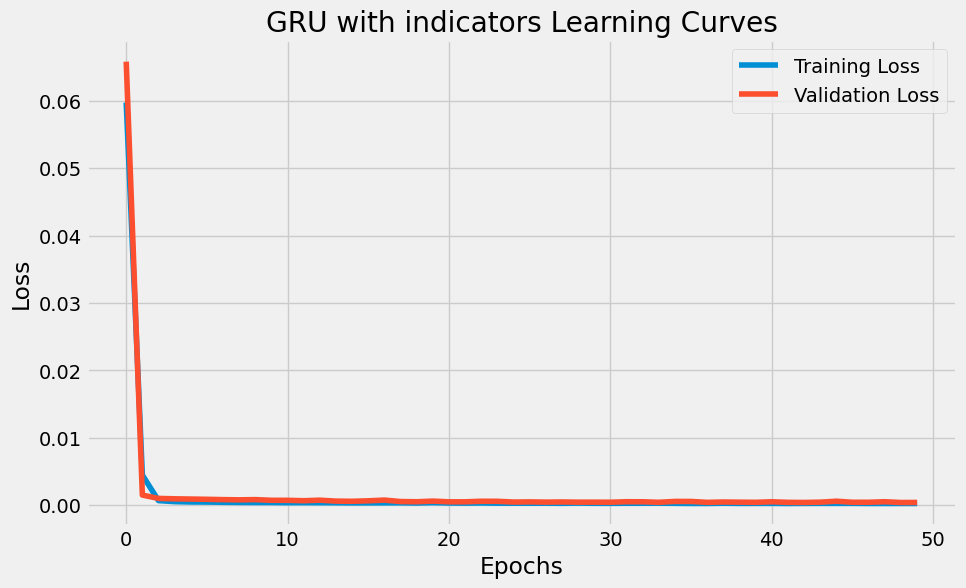

Train RMSE: 40.89663440517926, Train MAE: 27.45363950101318
Test RMSE: 69.33489675065147, Test MAE: 56.00653051461284


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, SimpleRNN, GRU
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = SP_500_df.dropna()
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Generate sequences for training
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data) - seq_length):
        x = data[i:(i+seq_length), :]
        y = data[i+seq_length, 0]  # The target output is the "Close" price
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

seq_length = 10  # Use 10 days of previous data to predict the next day
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Define the RNN model
model = Sequential()
model.add(GRU(50, activation='relu', return_sequences=True, input_shape=(seq_length, 3), name='gru_1'))
model.add(GRU(50, activation='relu', name='gru_2'))
model.add(Dense(1, name='dense_1'))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,  validation_split=0.1, callbacks=[early_stopping])

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Invert the scaling for the predictions
y_train_pred_inv = scaler.inverse_transform(np.concatenate([y_train_pred, np.zeros_like(y_train_pred), np.zeros_like(y_train_pred)], axis=1))[:, 0]
y_test_pred_inv = scaler.inverse_transform(np.concatenate([y_test_pred, np.zeros_like(y_test_pred), np.zeros_like(y_test_pred)], axis=1))[:, 0]

# Invert the scaling for the actual values
y_train_inv = scaler.inverse_transform(np.concatenate([y_train.reshape(-1, 1), X_train[:, -1, 1:]], axis=1))[:, 0]
y_test_inv = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), X_test[:, -1, 1:]], axis=1))[:, 0]

# Plot the train set predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label='Actual Prices', color = '#1f77b4', linewidth=3)
plt.plot(y_train_pred_inv, label='Train Predictios', color='#ff7f0e',linewidth=2.25)

# Plot the test set predictions, offset by the size of the train set
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_inv,color = '#1f77b4', linewidth=3)
plt.plot(np.arange(len(y_train_pred_inv), len(y_train_pred_inv) + len(y_test_pred_inv)), y_test_pred_inv, label='Test Predictions',
         color='#bcbd22',linewidth=2.25)

plt.title('GRU with indicators')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('GRU with indicators Learning Curves')
plt.legend()
plt.show()

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

# Calculate MAE
train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)

print(f'Train RMSE: {train_rmse}, Train MAE: {train_mae}')
print(f'Test RMSE: {test_rmse}, Test MAE: {test_mae}')


Epoch 1/50
29/29 [==============================] - 10s 51ms/step - loss: 0.0659 - mean_absolute_error: 0.1928 - val_loss: 0.0086 - val_mean_absolute_error: 0.0875
Epoch 2/50
29/29 [==============================] - 1s 33ms/step - loss: 0.0087 - mean_absolute_error: 0.0785 - val_loss: 0.0027 - val_mean_absolute_error: 0.0460
Epoch 3/50
29/29 [==============================] - 1s 31ms/step - loss: 0.0021 - mean_absolute_error: 0.0344 - val_loss: 0.0023 - val_mean_absolute_error: 0.0397
Epoch 4/50
29/29 [==============================] - 1s 30ms/step - loss: 6.2902e-04 - mean_absolute_error: 0.0180 - val_loss: 0.0024 - val_mean_absolute_error: 0.0401
Epoch 5/50
29/29 [==============================] - 1s 29ms/step - loss: 5.7969e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0011 - val_mean_absolute_error: 0.0264
Epoch 6/50
29/29 [==============================] - 1s 50ms/step - loss: 5.4213e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0019 - val_mean_absolute_error: 0.0352
Epoch 7/5

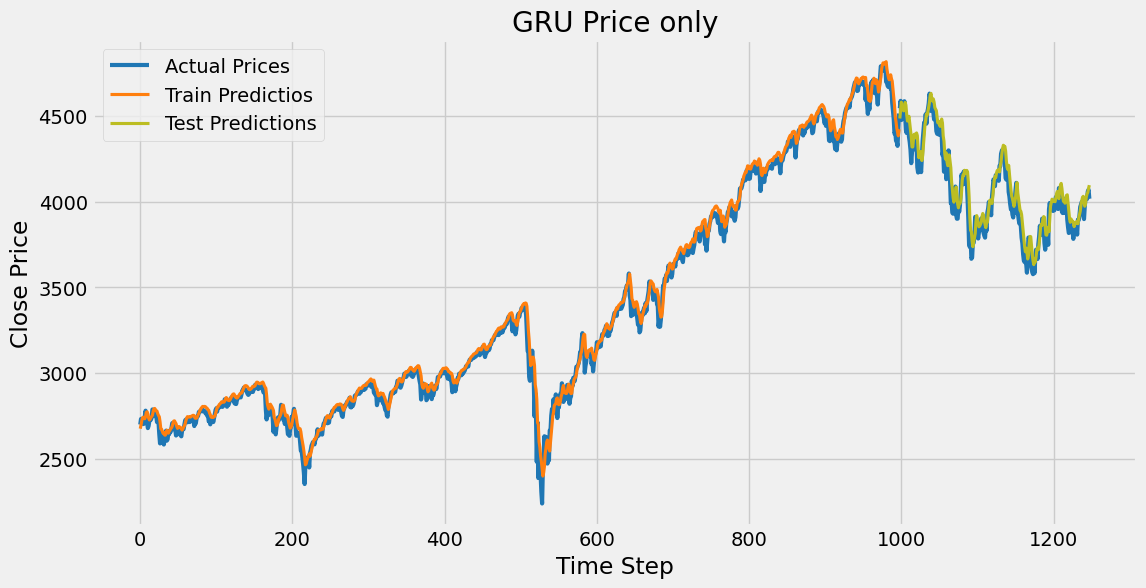

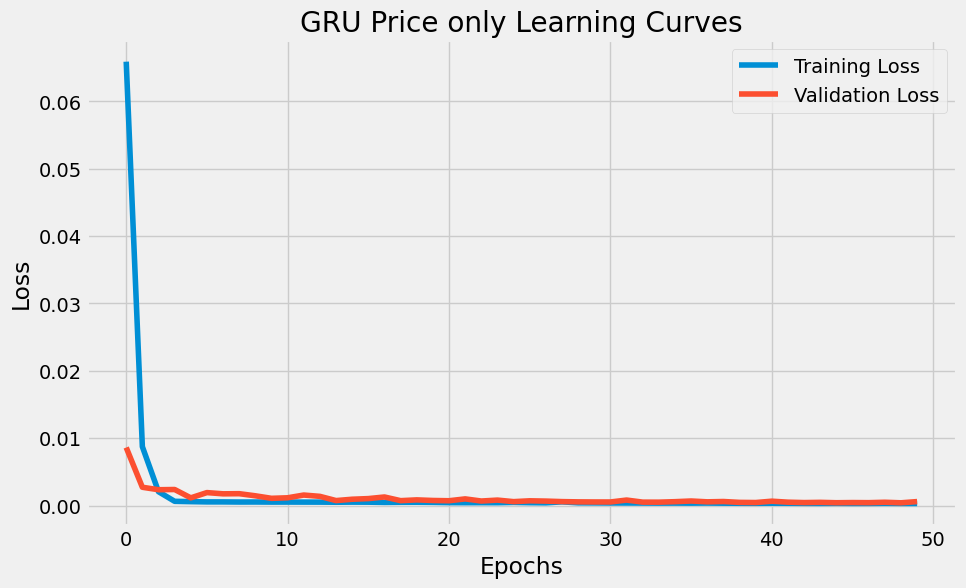

Train RMSE: 51.72583749965831, Train MAE: 35.66130136249061
Test RMSE: 82.36078609465011, Test MAE: 65.581875


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, SimpleRNN, GRU
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = SP_500_p.dropna()
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Generate sequences for training
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data) - seq_length):
        x = data[i:(i+seq_length), :]
        y = data[i+seq_length, 0]  # The target output is the "Close" price
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

seq_length = 10  # Use 10 days of previous data to predict the next day
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Define the RNN model
model = Sequential()
model.add(GRU(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1), name='gru_1'))
model.add(GRU(50, activation='relu', name='gru_2'))
model.add(Dense(1, name='dense_1'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,  validation_split=0.1, callbacks=[early_stopping])

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Invert the scaling for the predictions
y_train_pred_inv = scaler.inverse_transform(np.concatenate([y_train_pred, np.zeros_like(y_train_pred), np.zeros_like(y_train_pred)], axis=1))[:, 0]
y_test_pred_inv = scaler.inverse_transform(np.concatenate([y_test_pred, np.zeros_like(y_test_pred), np.zeros_like(y_test_pred)], axis=1))[:, 0]

# Invert the scaling for the actual values
y_train_inv = scaler.inverse_transform(np.concatenate([y_train.reshape(-1, 1), X_train[:, -1, 1:]], axis=1))[:, 0]
y_test_inv = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), X_test[:, -1, 1:]], axis=1))[:, 0]

# Plot the train set predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label='Actual Prices', color = '#1f77b4', linewidth=3)
plt.plot(y_train_pred_inv, label='Train Predictios', color='#ff7f0e',linewidth=2.25)

# Plot the test set predictions, offset by the size of the train set
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_inv,color = '#1f77b4', linewidth=3)
plt.plot(np.arange(len(y_train_pred_inv), len(y_train_pred_inv) + len(y_test_pred_inv)), y_test_pred_inv, label='Test Predictions',
         color='#bcbd22',linewidth=2.25)

plt.title('GRU Price only')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('GRU Price only Learning Curves')
plt.legend()
plt.show()

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

# Calculate MAE
train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)

print(f'Train RMSE: {train_rmse}, Train MAE: {train_mae}')
print(f'Test RMSE: {test_rmse}, Test MAE: {test_mae}')


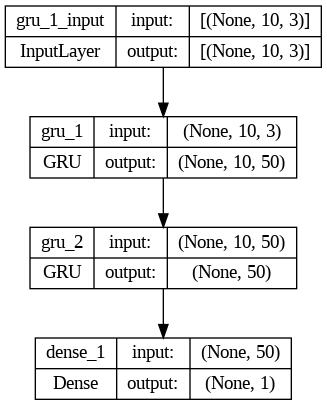

In [ ]:
# Plot the model
plot_model(model, to_file='model_plot_mlp.png', show_shapes=True, show_layer_names=True)